In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation, preprocessing, linear_model
import sklearn
sklearn.__version__

'0.19.1'

In [12]:
df=pd.read_csv('予約金額予測2.csv')

In [23]:
X_rg = df[['会員登録数']].values
X = df.iloc[: , 0:4]
#X=df[['Age']].Values
Y = df['予約金額'].values

In [24]:
#データの整形
sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)
sc.fit(X_rg)
X_rg= sc.transform(X_rg)

/Users/takeisatoshisui/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
#学習データとテストデータに分ける
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X,Y,test_size = 0.2 , random_state=0)
X_rg_train,X_rg_test,Y_train,Y_test = cross_validation.train_test_split(X_rg, Y, test_size = 0.2, random_state=0)

In [26]:
#SGD Regressorを適用する
clf = linear_model.SGDRegressor(max_iter= 1000)
clf.fit(X_train , Y_train)
clf_rg = linear_model.SGDRegressor(max_iter = 1000)
clf_rg.fit(X_rg_train,Y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [27]:
print('全部使用したときの回帰式の係数')
print(clf.intercept_)
print(clf.coef_)

全部使用したときの回帰式の係数
[14600599.05779426]
[ 345968.08340407 2004427.53805113 3842144.83443287 1500955.15343197]


<function matplotlib.pyplot.show(*args, **kw)>

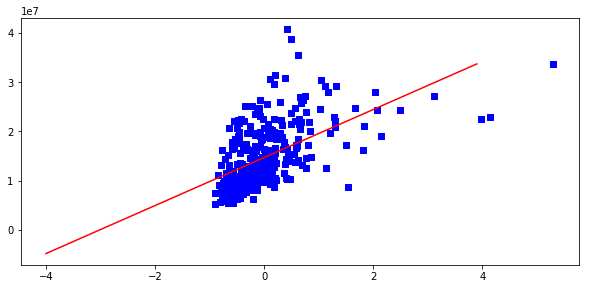

In [28]:
#結果をプロットする
%matplotlib inline
line_X=np.arange(-4,4,0.1) #3から10まで1刻み
line_Y = clf_rg.predict(line_X[:,np.newaxis])
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.scatter(X_rg_train, Y_train, c = 'b' , marker='s')
plt.plot(line_X , line_Y, c = 'r')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

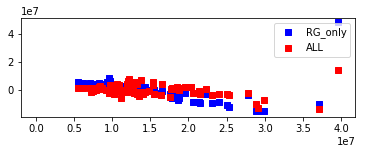

In [29]:
#誤差をプロットする
Y_rg_pred = clf_rg.predict(X_rg_test)
plt.subplot(2,1,2)
plt.scatter(Y_test, Y_rg_pred - Y_test, c = 'b' , marker='s',label = 'RG_only')

Y_pred = clf.predict(X_test)
plt.scatter(Y_test,Y_pred - Y_test, c= 'r' , marker = 's' , label = 'ALL')
plt.legend()
plt.hlines(y=0, xmin=0,xmax=50 , colors='black')
plt.show

In [30]:
print("/n「RGだけの平均2乗誤差」と「全部を使用したときの平均二乗誤差」")
RMS = np.mean((Y_pred - Y_test)**2)
RMS_rg = np.mean((Y_rg_pred - Y_test)**2)
print(RMS)
print(RMS_rg)

/n「RGだけの平均2乗誤差」と「全部を使用したときの平均二乗誤差」
15732073693904.293
52528203549017.39
